In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write, read
from scipy.fft import rfft, rfftfreq, irfft

ModuleNotFoundError: No module named 'scipy'

In [ ]:
audio_filename = 'noisy_tlou.wav'
sampling_rate, audio = read(audio_filename)

In [ ]:
normalized_tone = np.int16((audio / audio.max()) * 32767)
yf = rfft(normalized_tone)
N = len(audio)
xf = rfftfreq(N, 1 / sampling_rate)

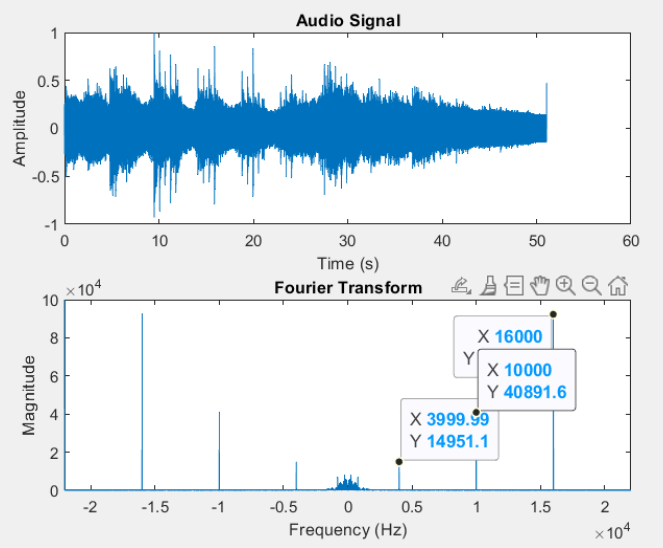

In [ ]:
points_to_remove = [[4000, 50], [10000, 85], [16000, 50]]

In [ ]:
points_per_freq = len(xf) / (sampling_rate / 2)
yf_clean = yf.copy()
xf_clean = xf.copy()
def remove_point(point, bias):
    target_idx = int(points_per_freq * point)
    yf_clean[target_idx - bias : target_idx + bias] = 0
    
for points in points_to_remove:
    remove_point(points[0], points[1])

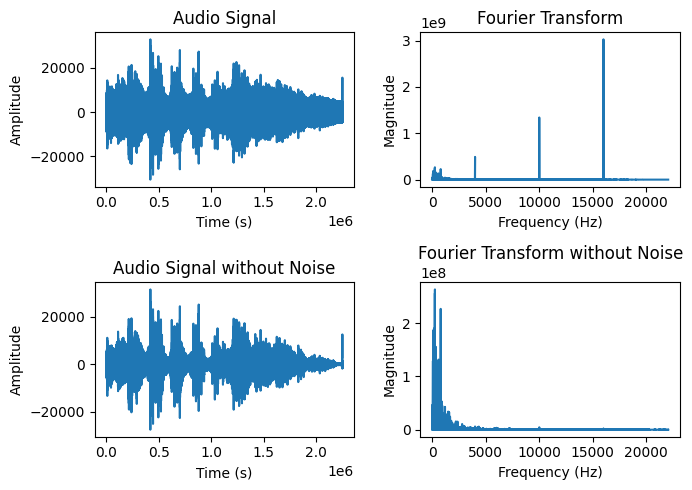

In [ ]:
plt.figure(figsize=(7, 5))

plt.subplot(2, 2, 1)
plt.plot(audio)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Signal')

plt.subplot(2, 2, 2)
plt.plot(xf, np.abs(yf))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform')

plt.subplot(2, 2, 3)
audio_without_noise = irfft(yf_clean)
plt.plot(audio_without_noise)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Audio Signal without Noise')

plt.subplot(2, 2, 4)
plt.plot(xf_clean, np.abs(yf_clean))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier Transform without Noise')

plt.tight_layout()
plt.show()

In [ ]:
def rescale(signal, a): # Calculating y(at)
    domain = len(signal)
    return np.interp(np.linspace(0, domain, int(1/a*domain)+1), np.arange(domain), signal)

In [ ]:
def rescale_using_fourirer(audio, sampling_rate, a): # Calculating y(at) using fourier
    yf = rfft(audio)
    frequence = rfftfreq(len(audio))
    scaled_frequence = frequence * a
    scaled_yf = irfft(yf)
    scaled_sampling_rate = int(sampling_rate * a)
    return np.asarray(scaled_yf.real, dtype=audio.dtype), scaled_sampling_rate


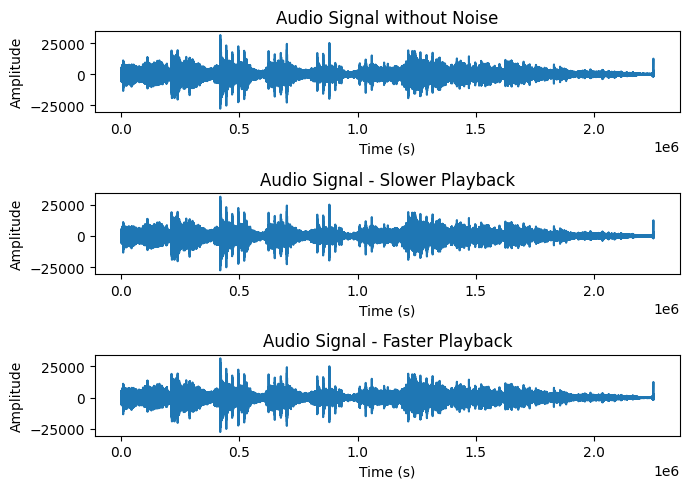

In [ ]:
fig = plt.figure(figsize=(7, 5))

ax1 = plt.subplot(3, 1, 1)
ax1.plot(audio_without_noise)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Audio Signal without Noise')

audio_slow, sampling_rate_slow = rescale_using_fourirer(audio_without_noise, sampling_rate, 0.5)
ax3 = plt.subplot(3, 1, 2)
ax3.plot(audio_slow)
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Amplitude')
ax3.set_title('Audio Signal - Slower Playback')

audio_fast, sampling_rate_fast = rescale_using_fourirer(audio_without_noise, sampling_rate, 2)
ax4 = plt.subplot(3, 1, 3)
ax4.plot(audio_fast)
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Amplitude')
ax4.set_title('Audio Signal - Faster Playback')

plt.tight_layout()
plt.show()

In [ ]:
def save_audio(filename, sampling_rate, audio):
    norm_new_sig = np.int16(audio * (32767 / audio.max()))
    write(filename, sampling_rate, norm_new_sig)

In [ ]:
save_audio('clean.wav', sampling_rate, audio_without_noise)
save_audio('slow.wav', sampling_rate_slow, audio_slow)
save_audio('fast.wav', sampling_rate_fast, audio_fast)

In [ ]:
def plot_signal(signal, sampling_rate, title=''):
    plt.figure(figsize=(7, 5))

    plt.subplot(3, 1, 1)
    plt.plot(signal, color='blue')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Audio Signal')

    freq = np.fft.rfftfreq(len(signal), d=1/sampling_rate)
    spectrum = np.abs(np.fft.rfft(signal))
    plt.subplot(3, 1, 2)
    plt.plot(freq, spectrum, color='green')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Fourier Transform')

    plt.subplot(3, 1, 3)
    powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(signal, Fs=sampling_rate, cmap='plasma')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.title('Spectrogram')
    plt.colorbar(format='%+2.0f dB')

    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.02)
    plt.show()

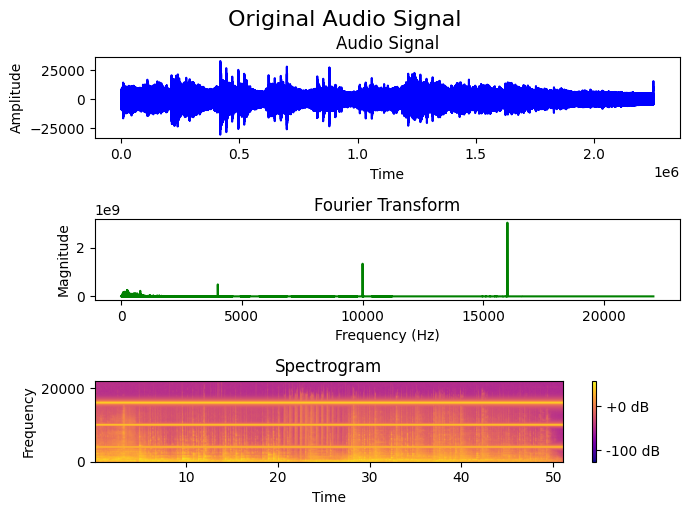

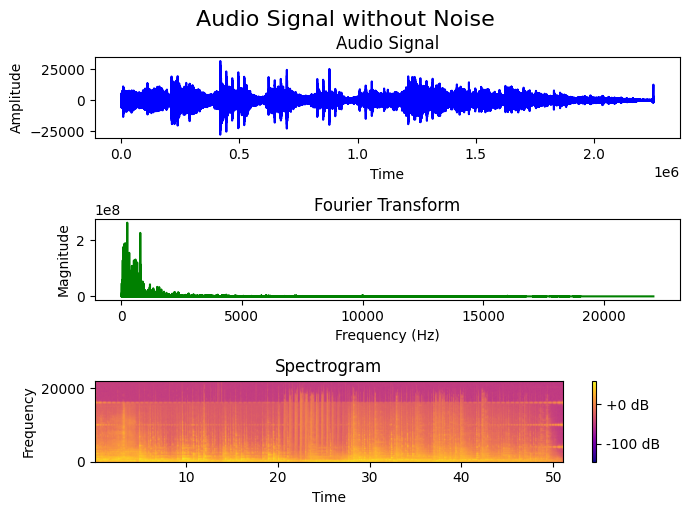

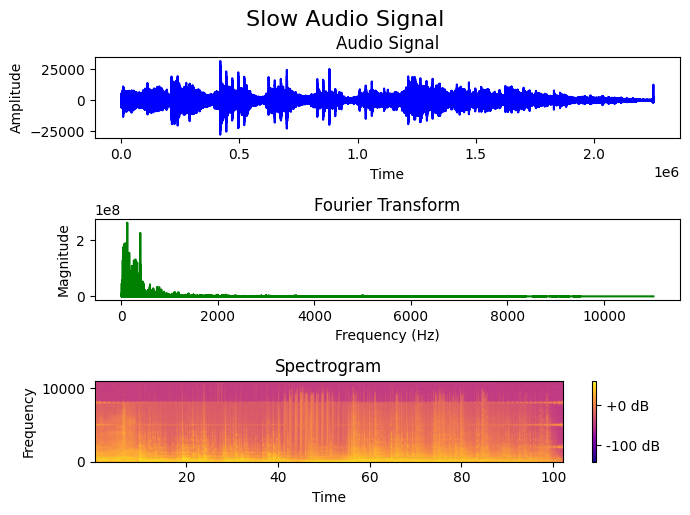

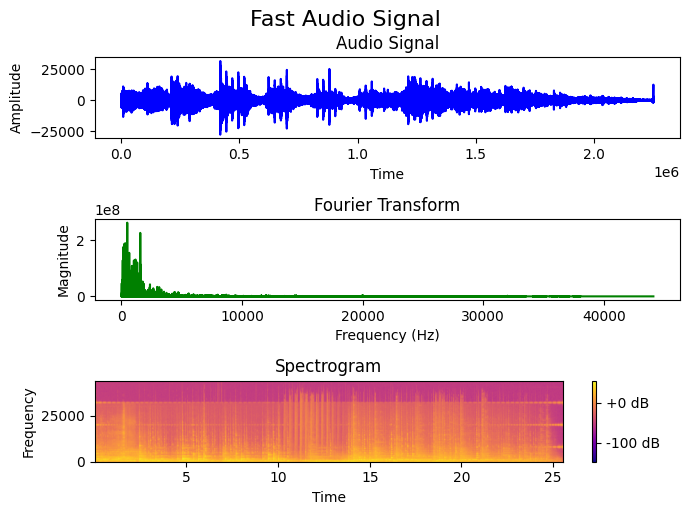

In [ ]:
plot_signal(audio, sampling_rate, title='Original Audio Signal')
plot_signal(audio_without_noise, sampling_rate, title='Audio Signal without Noise')
plot_signal(audio_slow, sampling_rate_slow, title='Slow Audio Signal')
plot_signal(audio_fast, sampling_rate_fast, title='Fast Audio Signal')